In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

I= 7
N= 3
DoB= 19990914
seed=int(DoB+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


19991617


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### Model 2 - Narrow weakly informative prior.

In [2]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
data_for_inference = {'N':100,
                      'M':200,
                      'x':generated_data.stan_variable('x')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [5]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██


INFO:cmdstanpy:CmdStan done processing.


In [6]:
print(fit_reg.diagnose())

Processing csv files: C:\Users\User\AppData\Local\Temp\tmp4i5bbbob\model2-20220405052854_1.csv, C:\Users\User\AppData\Local\Temp\tmp4i5bbbob\model2-20220405052854_2.csv, C:\Users\User\AppData\Local\Temp\tmp4i5bbbob\model2-20220405052854_3.csv, C:\Users\User\AppData\Local\Temp\tmp4i5bbbob\model2-20220405052854_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



# <span style='color:Yellow'> Task 2. Evaluating model </span>

In [7]:
df = fit_reg.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,beta[193],beta[194],beta[195],beta[196],beta[197],beta[198],beta[199],beta[200],alpha,sigma
0,-531.810,0.773435,0.315664,4.0,15.0,0.0,622.650,1.308500,0.113333,-0.919788,...,-0.350855,-2.424490,-0.351466,0.213085,-0.105314,-2.316590,1.271250,0.178859,4.290560,15.5082
1,-512.796,0.964704,0.315664,4.0,15.0,0.0,617.005,2.141670,0.201720,-1.241780,...,-0.995398,-1.215060,-0.684466,0.063437,-0.291575,-2.226330,0.260709,0.627926,3.023190,16.2920
2,-530.567,0.798612,0.315664,4.0,15.0,0.0,610.849,0.759350,1.231670,0.450158,...,-0.405877,-0.204565,-0.546963,-0.878713,0.223205,-0.329094,0.756363,1.003140,2.979460,17.0019
3,-535.867,0.713981,0.315664,4.0,15.0,0.0,641.118,0.547532,-0.821552,0.196928,...,-0.381009,0.465415,2.122230,0.705418,-0.289399,-1.490790,-0.315513,-0.526441,1.593830,14.5626
4,-529.729,0.997505,0.315664,4.0,15.0,0.0,619.930,0.336894,-1.455040,0.378469,...,-0.324000,0.462837,1.969730,0.346611,-0.502923,-1.019440,-0.565828,-0.284586,1.691100,14.6895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-544.039,0.967149,0.342107,4.0,15.0,0.0,644.464,1.519420,-0.122221,0.533306,...,-0.173404,0.402343,1.141500,-0.291106,0.896894,-1.793060,-0.321926,2.158380,0.715657,17.4310
3996,-529.191,0.976065,0.342107,4.0,15.0,0.0,644.231,0.090918,0.593003,-0.277247,...,-0.135416,0.174410,-0.891069,-0.143790,-1.367830,0.448037,0.807905,-0.973852,2.645200,16.3105
3997,-525.097,0.889300,0.342107,4.0,15.0,0.0,621.678,0.705261,0.861028,-0.347520,...,1.150460,-0.804971,0.249078,-0.502047,-0.222744,0.141813,0.741144,-0.323293,0.913734,15.5950
3998,-531.529,0.907424,0.342107,4.0,15.0,0.0,617.438,0.933898,-0.730004,0.172435,...,-1.093780,1.032660,0.585385,0.655927,-1.366230,-1.156950,0.018288,0.161616,1.653480,15.3300


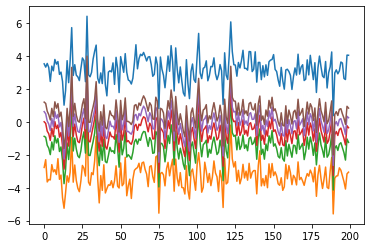

In [8]:
def plots(b):
    max = []
    min = []

    quantiles = {}
    quantiles['q1'] = []
    quantiles['q2'] = []
    quantiles['q3'] = []
    quantiles['q4'] = []
    quantiles['q5'] = []
    for i in range(b.shape[1]):
        b_c = b[:,i] 
        max.append(np.max(b_c))
        min.append(np.min(b_c))

    
        quantiles['q1'].append(np.quantile(b_c, 0.05))
        quantiles['q2'].append(np.quantile(b_c, 0.25))
        quantiles['q3'].append(np.quantile(b_c, 0.5))
        quantiles['q4'].append(np.quantile(b_c, 0.75))
        quantiles['q5'].append(np.quantile(b_c, 0.95))

    plt.plot(max)
    plt.plot(min)


    for i in range(1,len(quantiles.keys())):
        plt.plot(quantiles['q'+str(i)])

    plt.show()

beta = fit_reg.stan_variable('beta')
plots(beta)

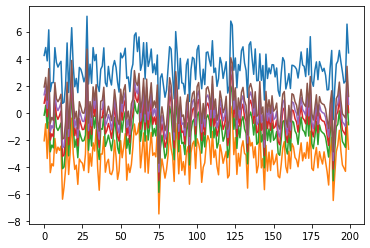

In [9]:
residues = beta - data_for_inference['x'][:,0]
plots(residues)